scikit-learn: sklearn 機器學習

pandas: 表格處理

numpy: 多維陣列函式庫

opencv: 影像處理/AI函式庫

Pillow(PIL): 影像處理

資料量需求

機器學習: 1k-1w以上
深度學習: 1w-10w以上

題目難度 <-> 資料需求

簡單: 少點ok
難: 多一點

題目難度可以參考欄位數目

數學公式寫法 LaTex

$ Area = \frac{1}{2+x}\pi{R^2} $


匯入資料集

In [ ]:
import pandas as pd

from sklearn.datasets import load_iris

iris = load_iris()

x = pd.DataFrame(iris["data"], columns=iris["feature_names"])

y = iris["target"]

total = x[:] # 取出 x 的資料創建一個新的 list，否則原本 x 將會被覆蓋

total["ans"] = iris["target"]

total.to_csv("iris.csv", index = False, encoding = "utf-8")

<ipython-input-1-46047c5af23a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total["ans"] = iris["target"]


把資料分成兩份：訓練 / 驗證


In [ ]:
import numpy as np

from sklearn.model_selection import train_test_split

# 進到sklearn以前: pd.DataFrame

# 進到sklearn以後(train_test_split): np.array

x_np = np.array(x)
y_np = np.array(y)

x_train, x_test, y_train, y_test = train_test_split(x_np, y_np ,test_size=0.1)

#90%xnp, 10%xnp, 90%ynp, 10%ynp

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(135, 4)
(15, 4)
(135,)
(15,)


In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=2)

clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2)

訓練結果

# 決策樹每一層的選擇: 目標(確定程度提高最高) -> Gini(猜錯機率)降低

# 一顆決策樹 -> 信心程度100%(Gini=0)

# $Gini(p) = \sum_{k=1}^{K}p_k(1-p_k)$

[Text(0.4, 0.8333333333333334, 'petal width (cm) <= 0.75\ngini = 0.667\nsamples = 135\nvalue = [44, 46, 45]\nclass = versicolor'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 44\nvalue = [44, 0, 0]\nclass = setosa'),
 Text(0.6, 0.5, 'petal width (cm) <= 1.75\ngini = 0.5\nsamples = 91\nvalue = [0, 46, 45]\nclass = versicolor'),
 Text(0.4, 0.16666666666666666, 'gini = 0.18\nsamples = 50\nvalue = [0, 45, 5]\nclass = versicolor'),
 Text(0.8, 0.16666666666666666, 'gini = 0.048\nsamples = 41\nvalue = [0, 1, 40]\nclass = virginica')]

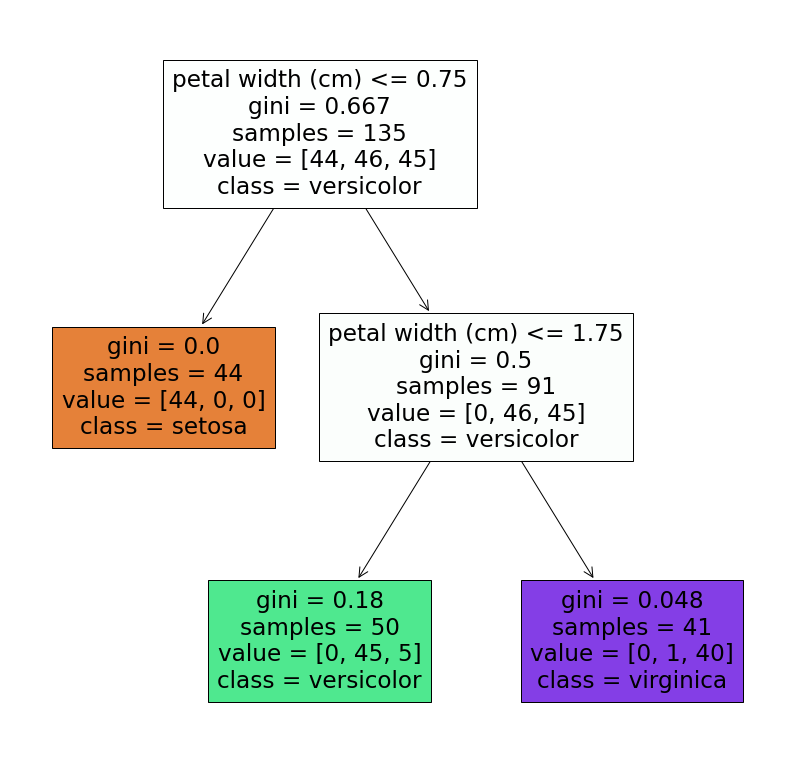

In [ ]:
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree

plt.figure(figsize=(14,14))

plot_tree(clf,
     feature_names=x.columns,
     class_names=iris["target_names"],
     filled=True)

In [ ]:
from sklearn.metrics import accuracy_score

pre = clf.predict(x_test)

accuracy_score(y_test, pre)

1.0

1. 模型不要學到完美(學到太多稀少例外導致沒看過的問題錯更多) -> 避免過擬合
2. 決策樹優點 -> 可解釋性